In [1]:
import pandas as pd

In [81]:
data = pd.read_csv('train.csv')


In [19]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [84]:
import numpy as np
d1 = pd.notna(data)
#sns.barplot(y='Cabin',x='Sex', data=data)
d2 = np.where(data['Cabin'].isnull(),1,0)
data['Cabin_null']=d2
data.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

In [83]:
data = pd.read_csv('train.csv')

#### All the techniques of handling missing values
1. Mean/Median/Mode Replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution Imputation
5. Arbitrary Imputation
6. Frequent Category imputation

#### 1. Mean/Median /Mode Imputation

When should we apply this ?
Mean Median IMputation has the asssumption that the data are missing completely at random 
We solve this by replacing the NAN with the most Frequent occurance of the variable


In [93]:
data = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [94]:
data

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


#Go and see the percentage of missing values 

In [96]:
 data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [97]:
data

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [104]:
def impute_nan(data , coln, method):
    d2=data[coln].fillna(method)
    data[coln+"_median"]=d2
    
    
median = data['Age'].median()
impute_nan(data,'Age',median)
data

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


#### NOTE - Median function has a default parameter skipna=True which means it ignores the NA values during median calculation

In [107]:
#Comparing Standard Deviation
print(data['Age'].std())
print(data['Age_median'].std())

14.526497332334044
13.019696550973194


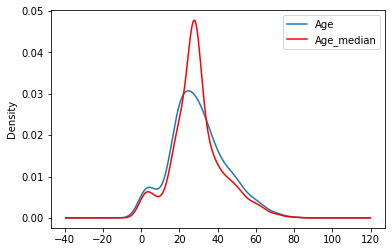

In [116]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
data['Age'].plot(kind='kde', ax=ax) 
data.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

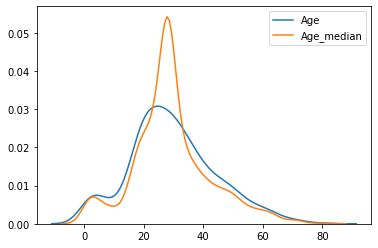

In [140]:
####Through seaborn

import seaborn as sns
sns.kdeplot(data['Age'])
sns.kdeplot(data['Age_median'])



#### A dvantage and Disdvantage of Mean Median Mode
1.Robust to outliers

disdvantage - 
1. Distortion in Varience
2. Impacts Corelation
